# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.exclude_past, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 2796 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.exclude_past, max_distance=1)


  0% (   0 of 2796) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   8 of 2796) |                       | Elapsed Time: 0:00:27 ETA: 2:41:22

  0% (  24 of 2796) |                       | Elapsed Time: 0:00:28 ETA: 0:53:55

  1% (  42 of 2796) |                       | Elapsed Time: 0:00:28 ETA: 0:30:54

  2% (  57 of 2796) |                       | Elapsed Time: 0:00:28 ETA: 0:22:49

  2% (  70 of 2796) |                       | Elapsed Time: 0:00:28 ETA: 0:20:18

  3% (  85 of 2796) |                       | Elapsed Time: 0:00:28 ETA: 0:00:39

  3% (  99 of 2796) |                       | Elapsed Time: 0:00:29 ETA: 0:00:40

  3% ( 111 of 2796) |                       | Elapsed Time: 0:00:29 ETA: 0:00:40

  4% ( 123 of 2796) |#                      | Elapsed Time: 0:00:29 ETA: 0:00:42

  4% ( 134 of 2796) |#                      | Elapsed Time: 0:00:29 ETA: 0:00:43

  5% ( 146 of 2796) |#                      | Elapsed Time: 0:00:29 ETA: 0:00:45

  5% ( 160 of 2796) |#                      | Elapsed Time: 0:00:30 ETA: 0:00:45

  6% ( 175 of 2796) |#                      | Elapsed Time: 0:00:30 ETA: 0:00:44

  6% ( 190 of 2796) |#                      | Elapsed Time: 0:00:30 ETA: 0:00:41

  7% ( 210 of 2796) |#                      | Elapsed Time: 0:00:30 ETA: 0:00:39

  8% ( 226 of 2796) |#                      | Elapsed Time: 0:00:31 ETA: 0:00:37

  8% ( 245 of 2796) |##                     | Elapsed Time: 0:00:31 ETA: 0:00:36

  9% ( 260 of 2796) |##                     | Elapsed Time: 0:00:31 ETA: 0:00:35

 10% ( 280 of 2796) |##                     | Elapsed Time: 0:00:31 ETA: 0:00:34

 10% ( 294 of 2796) |##                     | Elapsed Time: 0:00:32 ETA: 0:00:35

 11% ( 315 of 2796) |##                     | Elapsed Time: 0:00:32 ETA: 0:00:35

 11% ( 329 of 2796) |##                     | Elapsed Time: 0:00:32 ETA: 0:00:36

 12% ( 343 of 2796) |##                     | Elapsed Time: 0:00:32 ETA: 0:00:36

 12% ( 358 of 2796) |##                     | Elapsed Time: 0:00:33 ETA: 0:00:35

 13% ( 376 of 2796) |###                    | Elapsed Time: 0:00:33 ETA: 0:00:34

 14% ( 393 of 2796) |###                    | Elapsed Time: 0:00:33 ETA: 0:00:33

 14% ( 409 of 2796) |###                    | Elapsed Time: 0:00:33 ETA: 0:00:32

 15% ( 427 of 2796) |###                    | Elapsed Time: 0:00:34 ETA: 0:00:33

 15% ( 442 of 2796) |###                    | Elapsed Time: 0:00:34 ETA: 0:00:34

 16% ( 463 of 2796) |###                    | Elapsed Time: 0:00:34 ETA: 0:00:34

 17% ( 477 of 2796) |###                    | Elapsed Time: 0:00:34 ETA: 0:00:34

 17% ( 497 of 2796) |####                   | Elapsed Time: 0:00:35 ETA: 0:00:34

 18% ( 511 of 2796) |####                   | Elapsed Time: 0:00:35 ETA: 0:00:34

 18% ( 525 of 2796) |####                   | Elapsed Time: 0:00:35 ETA: 0:00:33

 19% ( 541 of 2796) |####                   | Elapsed Time: 0:00:35 ETA: 0:00:33

 20% ( 560 of 2796) |####                   | Elapsed Time: 0:00:35 ETA: 0:00:32

 20% ( 573 of 2796) |####                   | Elapsed Time: 0:00:36 ETA: 0:00:33

 20% ( 587 of 2796) |####                   | Elapsed Time: 0:00:36 ETA: 0:00:33

 21% ( 602 of 2796) |####                   | Elapsed Time: 0:00:36 ETA: 0:00:33

 22% ( 616 of 2796) |#####                  | Elapsed Time: 0:00:36 ETA: 0:00:33

 22% ( 630 of 2796) |#####                  | Elapsed Time: 0:00:37 ETA: 0:00:33

 23% ( 644 of 2796) |#####                  | Elapsed Time: 0:00:37 ETA: 0:00:33

 23% ( 658 of 2796) |#####                  | Elapsed Time: 0:00:37 ETA: 0:00:32

 24% ( 672 of 2796) |#####                  | Elapsed Time: 0:00:37 ETA: 0:00:31

 24% ( 685 of 2796) |#####                  | Elapsed Time: 0:00:37 ETA: 0:00:32

 25% ( 700 of 2796) |#####                  | Elapsed Time: 0:00:38 ETA: 0:00:31

 25% ( 714 of 2796) |#####                  | Elapsed Time: 0:00:38 ETA: 0:00:31

 26% ( 734 of 2796) |######                 | Elapsed Time: 0:00:38 ETA: 0:00:31

 26% ( 748 of 2796) |######                 | Elapsed Time: 0:00:38 ETA: 0:00:30

 27% ( 762 of 2796) |######                 | Elapsed Time: 0:00:39 ETA: 0:00:30

 27% ( 776 of 2796) |######                 | Elapsed Time: 0:00:39 ETA: 0:00:29

 28% ( 789 of 2796) |######                 | Elapsed Time: 0:00:39 ETA: 0:00:30

 28% ( 804 of 2796) |######                 | Elapsed Time: 0:00:39 ETA: 0:00:30

 29% ( 818 of 2796) |######                 | Elapsed Time: 0:00:39 ETA: 0:00:30

 29% ( 832 of 2796) |######                 | Elapsed Time: 0:00:40 ETA: 0:00:30

 30% ( 846 of 2796) |######                 | Elapsed Time: 0:00:40 ETA: 0:00:29

 30% ( 860 of 2796) |#######                | Elapsed Time: 0:00:40 ETA: 0:00:29

 31% ( 874 of 2796) |#######                | Elapsed Time: 0:00:40 ETA: 0:00:29

 31% ( 888 of 2796) |#######                | Elapsed Time: 0:00:40 ETA: 0:00:29

 32% ( 902 of 2796) |#######                | Elapsed Time: 0:00:41 ETA: 0:00:29

 32% ( 916 of 2796) |#######                | Elapsed Time: 0:00:41 ETA: 0:00:29

 33% ( 932 of 2796) |#######                | Elapsed Time: 0:00:41 ETA: 0:00:28

 34% ( 951 of 2796) |#######                | Elapsed Time: 0:00:41 ETA: 0:00:28

 34% ( 965 of 2796) |#######                | Elapsed Time: 0:00:42 ETA: 0:00:27

 35% ( 979 of 2796) |########               | Elapsed Time: 0:00:42 ETA: 0:00:27

 35% ( 994 of 2796) |########               | Elapsed Time: 0:00:42 ETA: 0:00:27

 36% (1014 of 2796) |########               | Elapsed Time: 0:00:42 ETA: 0:00:27

 36% (1029 of 2796) |########               | Elapsed Time: 0:00:43 ETA: 0:00:26

 37% (1049 of 2796) |########               | Elapsed Time: 0:00:43 ETA: 0:00:25

 38% (1064 of 2796) |########               | Elapsed Time: 0:00:43 ETA: 0:00:25

 38% (1078 of 2796) |########               | Elapsed Time: 0:00:43 ETA: 0:00:25

 39% (1091 of 2796) |########               | Elapsed Time: 0:00:44 ETA: 0:00:25

 39% (1107 of 2796) |#########              | Elapsed Time: 0:00:44 ETA: 0:00:25

 40% (1127 of 2796) |#########              | Elapsed Time: 0:00:44 ETA: 0:00:24

 40% (1141 of 2796) |#########              | Elapsed Time: 0:00:44 ETA: 0:00:24

 41% (1154 of 2796) |#########              | Elapsed Time: 0:00:44 ETA: 0:00:24

 41% (1169 of 2796) |#########              | Elapsed Time: 0:00:45 ETA: 0:00:24

 42% (1189 of 2796) |#########              | Elapsed Time: 0:00:45 ETA: 0:00:24

 43% (1203 of 2796) |#########              | Elapsed Time: 0:00:45 ETA: 0:00:24

 43% (1217 of 2796) |##########             | Elapsed Time: 0:00:45 ETA: 0:00:24

 44% (1231 of 2796) |##########             | Elapsed Time: 0:00:46 ETA: 0:00:23

 44% (1245 of 2796) |##########             | Elapsed Time: 0:00:46 ETA: 0:00:23

 45% (1259 of 2796) |##########             | Elapsed Time: 0:00:46 ETA: 0:00:23

 45% (1275 of 2796) |##########             | Elapsed Time: 0:00:46 ETA: 0:00:22

 46% (1294 of 2796) |##########             | Elapsed Time: 0:00:47 ETA: 0:00:22

 46% (1308 of 2796) |##########             | Elapsed Time: 0:00:47 ETA: 0:00:21

 47% (1322 of 2796) |##########             | Elapsed Time: 0:00:47 ETA: 0:00:21

 47% (1336 of 2796) |##########             | Elapsed Time: 0:00:47 ETA: 0:00:21

 48% (1350 of 2796) |###########            | Elapsed Time: 0:00:47 ETA: 0:00:22

 48% (1364 of 2796) |###########            | Elapsed Time: 0:00:48 ETA: 0:00:21

 49% (1379 of 2796) |###########            | Elapsed Time: 0:00:48 ETA: 0:00:21

 50% (1399 of 2796) |###########            | Elapsed Time: 0:00:48 ETA: 0:00:21

 50% (1412 of 2796) |###########            | Elapsed Time: 0:00:48 ETA: 0:00:21

 51% (1426 of 2796) |###########            | Elapsed Time: 0:00:49 ETA: 0:00:20

 51% (1440 of 2796) |###########            | Elapsed Time: 0:00:49 ETA: 0:00:21

 52% (1455 of 2796) |###########            | Elapsed Time: 0:00:49 ETA: 0:00:20

 52% (1475 of 2796) |############           | Elapsed Time: 0:00:49 ETA: 0:00:19

 53% (1489 of 2796) |############           | Elapsed Time: 0:00:50 ETA: 0:00:19

 53% (1503 of 2796) |############           | Elapsed Time: 0:00:50 ETA: 0:00:19

 54% (1517 of 2796) |############           | Elapsed Time: 0:00:50 ETA: 0:00:19

 54% (1531 of 2796) |############           | Elapsed Time: 0:00:50 ETA: 0:00:19

 55% (1546 of 2796) |############           | Elapsed Time: 0:00:50 ETA: 0:00:19

 55% (1560 of 2796) |############           | Elapsed Time: 0:00:51 ETA: 0:00:18

 56% (1573 of 2796) |############           | Elapsed Time: 0:00:52 ETA: 0:00:34

 56% (1587 of 2796) |#############          | Elapsed Time: 0:00:52 ETA: 0:00:34

 57% (1601 of 2796) |#############          | Elapsed Time: 0:00:52 ETA: 0:00:33

 57% (1615 of 2796) |#############          | Elapsed Time: 0:00:52 ETA: 0:00:34

 58% (1629 of 2796) |#############          | Elapsed Time: 0:00:53 ETA: 0:00:17

 58% (1643 of 2796) |#############          | Elapsed Time: 0:00:53 ETA: 0:00:17

 59% (1658 of 2796) |#############          | Elapsed Time: 0:00:53 ETA: 0:00:17

 60% (1678 of 2796) |#############          | Elapsed Time: 0:00:53 ETA: 0:00:17

 60% (1692 of 2796) |#############          | Elapsed Time: 0:00:53 ETA: 0:00:16

 61% (1706 of 2796) |##############         | Elapsed Time: 0:00:54 ETA: 0:00:16

 61% (1720 of 2796) |##############         | Elapsed Time: 0:00:54 ETA: 0:00:16

 62% (1734 of 2796) |##############         | Elapsed Time: 0:00:54 ETA: 0:00:16

 62% (1748 of 2796) |##############         | Elapsed Time: 0:00:54 ETA: 0:00:16

 63% (1762 of 2796) |##############         | Elapsed Time: 0:00:55 ETA: 0:00:16

 63% (1776 of 2796) |##############         | Elapsed Time: 0:00:55 ETA: 0:00:15

 64% (1790 of 2796) |##############         | Elapsed Time: 0:00:55 ETA: 0:00:15

 64% (1805 of 2796) |##############         | Elapsed Time: 0:00:55 ETA: 0:00:15

 65% (1824 of 2796) |###############        | Elapsed Time: 0:00:56 ETA: 0:00:15

 65% (1838 of 2796) |###############        | Elapsed Time: 0:00:56 ETA: 0:00:14

 66% (1853 of 2796) |###############        | Elapsed Time: 0:00:56 ETA: 0:00:14

 66% (1868 of 2796) |###############        | Elapsed Time: 0:00:56 ETA: 0:00:14

 67% (1888 of 2796) |###############        | Elapsed Time: 0:00:57 ETA: 0:00:13

 68% (1902 of 2796) |###############        | Elapsed Time: 0:00:57 ETA: 0:00:13

 68% (1916 of 2796) |###############        | Elapsed Time: 0:00:57 ETA: 0:00:13

 69% (1930 of 2796) |###############        | Elapsed Time: 0:00:57 ETA: 0:00:13

 69% (1945 of 2796) |###############        | Elapsed Time: 0:00:57 ETA: 0:00:13

 70% (1965 of 2796) |################       | Elapsed Time: 0:00:58 ETA: 0:00:12

 70% (1980 of 2796) |################       | Elapsed Time: 0:00:58 ETA: 0:00:12

 71% (2000 of 2796) |################       | Elapsed Time: 0:00:58 ETA: 0:00:12

 72% (2014 of 2796) |################       | Elapsed Time: 0:00:58 ETA: 0:00:12

 72% (2028 of 2796) |################       | Elapsed Time: 0:00:59 ETA: 0:00:11

 73% (2042 of 2796) |################       | Elapsed Time: 0:00:59 ETA: 0:00:11

 73% (2056 of 2796) |################       | Elapsed Time: 0:00:59 ETA: 0:00:11

 74% (2070 of 2796) |#################      | Elapsed Time: 0:00:59 ETA: 0:00:11

 74% (2084 of 2796) |#################      | Elapsed Time: 0:01:00 ETA: 0:00:11

 75% (2098 of 2796) |#################      | Elapsed Time: 0:01:00 ETA: 0:00:10

 75% (2112 of 2796) |#################      | Elapsed Time: 0:01:00 ETA: 0:00:10

 76% (2132 of 2796) |#################      | Elapsed Time: 0:01:00 ETA: 0:00:10

 76% (2146 of 2796) |#################      | Elapsed Time: 0:01:01 ETA: 0:00:10

 77% (2160 of 2796) |#################      | Elapsed Time: 0:01:01 ETA: 0:00:09

 77% (2174 of 2796) |#################      | Elapsed Time: 0:01:01 ETA: 0:00:09

 78% (2188 of 2796) |#################      | Elapsed Time: 0:01:01 ETA: 0:00:09

 78% (2202 of 2796) |##################     | Elapsed Time: 0:01:01 ETA: 0:00:08

 79% (2216 of 2796) |##################     | Elapsed Time: 0:01:02 ETA: 0:00:08

 79% (2228 of 2796) |##################     | Elapsed Time: 0:01:02 ETA: 0:00:08

 80% (2244 of 2796) |##################     | Elapsed Time: 0:01:02 ETA: 0:00:08

 80% (2258 of 2796) |##################     | Elapsed Time: 0:01:02 ETA: 0:00:08

 81% (2272 of 2796) |##################     | Elapsed Time: 0:01:02 ETA: 0:00:08

 81% (2286 of 2796) |##################     | Elapsed Time: 0:01:03 ETA: 0:00:07

 82% (2300 of 2796) |##################     | Elapsed Time: 0:01:03 ETA: 0:00:07

 82% (2314 of 2796) |###################    | Elapsed Time: 0:01:03 ETA: 0:00:07

 83% (2327 of 2796) |###################    | Elapsed Time: 0:01:03 ETA: 0:00:07

 83% (2342 of 2796) |###################    | Elapsed Time: 0:01:04 ETA: 0:00:06

 84% (2356 of 2796) |###################    | Elapsed Time: 0:01:04 ETA: 0:00:06

 84% (2369 of 2796) |###################    | Elapsed Time: 0:01:04 ETA: 0:00:06

 85% (2384 of 2796) |###################    | Elapsed Time: 0:01:04 ETA: 0:00:06

 85% (2398 of 2796) |###################    | Elapsed Time: 0:01:04 ETA: 0:00:06

 86% (2412 of 2796) |###################    | Elapsed Time: 0:01:05 ETA: 0:00:05

 86% (2426 of 2796) |###################    | Elapsed Time: 0:01:05 ETA: 0:00:05

 87% (2441 of 2796) |####################   | Elapsed Time: 0:01:05 ETA: 0:00:05

 87% (2455 of 2796) |####################   | Elapsed Time: 0:01:05 ETA: 0:00:05

 88% (2469 of 2796) |####################   | Elapsed Time: 0:01:05 ETA: 0:00:04

 89% (2489 of 2796) |####################   | Elapsed Time: 0:01:06 ETA: 0:00:04

 89% (2503 of 2796) |####################   | Elapsed Time: 0:01:06 ETA: 0:00:04

 90% (2517 of 2796) |####################   | Elapsed Time: 0:01:06 ETA: 0:00:04

 90% (2529 of 2796) |####################   | Elapsed Time: 0:01:06 ETA: 0:00:04

 90% (2543 of 2796) |####################   | Elapsed Time: 0:01:07 ETA: 0:00:03

 91% (2559 of 2796) |#####################  | Elapsed Time: 0:01:07 ETA: 0:00:03

 92% (2573 of 2796) |#####################  | Elapsed Time: 0:01:07 ETA: 0:00:03

 92% (2587 of 2796) |#####################  | Elapsed Time: 0:01:07 ETA: 0:00:03

 93% (2601 of 2796) |#####################  | Elapsed Time: 0:01:07 ETA: 0:00:02

 93% (2615 of 2796) |#####################  | Elapsed Time: 0:01:08 ETA: 0:00:02

 94% (2629 of 2796) |#####################  | Elapsed Time: 0:01:08 ETA: 0:00:02

 94% (2643 of 2796) |#####################  | Elapsed Time: 0:01:08 ETA: 0:00:02

 95% (2657 of 2796) |#####################  | Elapsed Time: 0:01:08 ETA: 0:00:02

 95% (2671 of 2796) |#####################  | Elapsed Time: 0:01:09 ETA: 0:00:01

 96% (2685 of 2796) |###################### | Elapsed Time: 0:01:09 ETA: 0:00:01

 96% (2699 of 2796) |###################### | Elapsed Time: 0:01:09 ETA: 0:00:01

 97% (2714 of 2796) |###################### | Elapsed Time: 0:01:09 ETA: 0:00:01

 97% (2727 of 2796) |###################### | Elapsed Time: 0:01:09 ETA: 0:00:01

 98% (2741 of 2796) |###################### | Elapsed Time: 0:01:10 ETA: 0:00:00

 98% (2755 of 2796) |###################### | Elapsed Time: 0:01:10 ETA: 0:00:00

 99% (2769 of 2796) |###################### | Elapsed Time: 0:01:10 ETA: 0:00:00

 99% (2782 of 2796) |###################### | Elapsed Time: 0:01:10 ETA: 0:00:00

100% (2796 of 2796) |######################| Elapsed Time: 0:01:11 Time: 0:01:11


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | *** | *** | *** | *   |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *   | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | ns. |
H_00 | *** | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | ns. | *   |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |


H_00 | ns. | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *   |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | ns. | **  | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |


H_00 | ns. | ns. | ns. | *   |


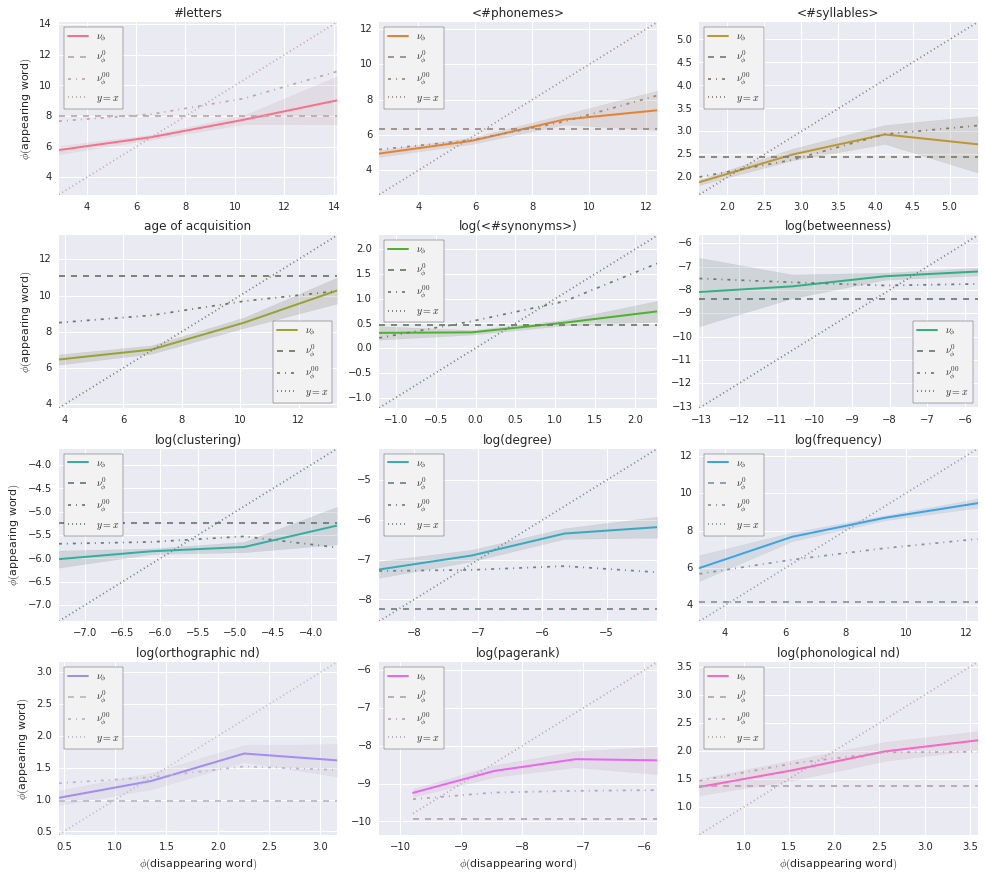

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

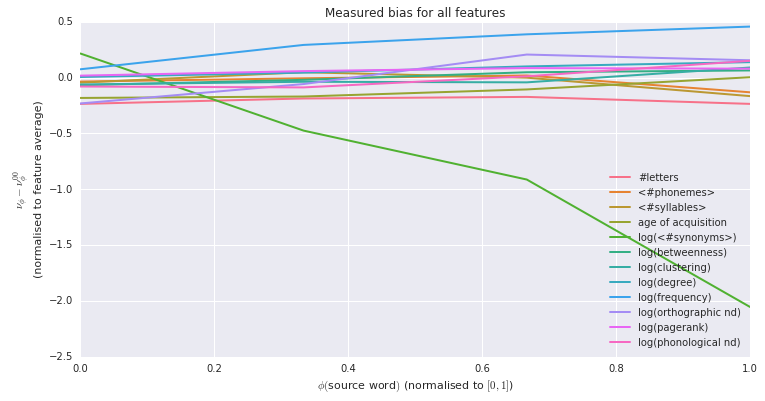

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | *   |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | *** | *** | *** | *   |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | ns. | *   |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | *** |
H_00 | *** | ns. | **  | ns. |


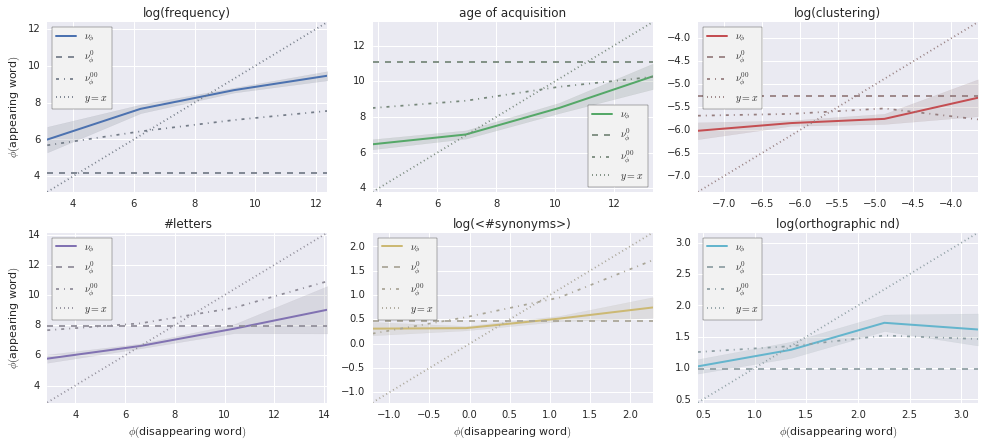

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

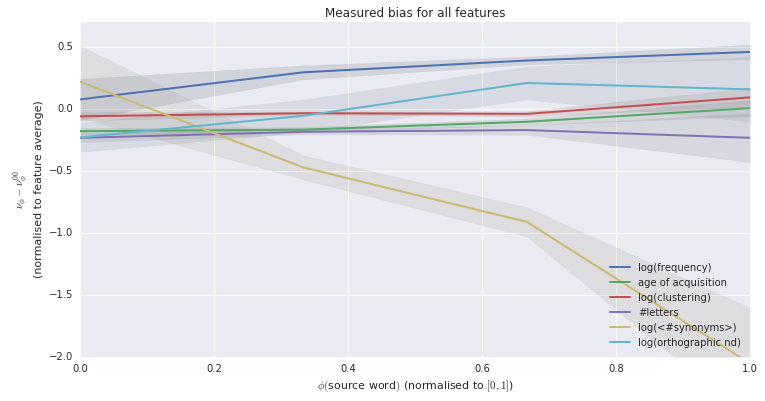

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *** |
H_00 | *   | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |
------------------------
H_0  | *** | *** | **  |
H_00 | *** | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | **  |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | ns. | ns. | **  |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |


H_00 | ns. | ns. | ns. | *   |


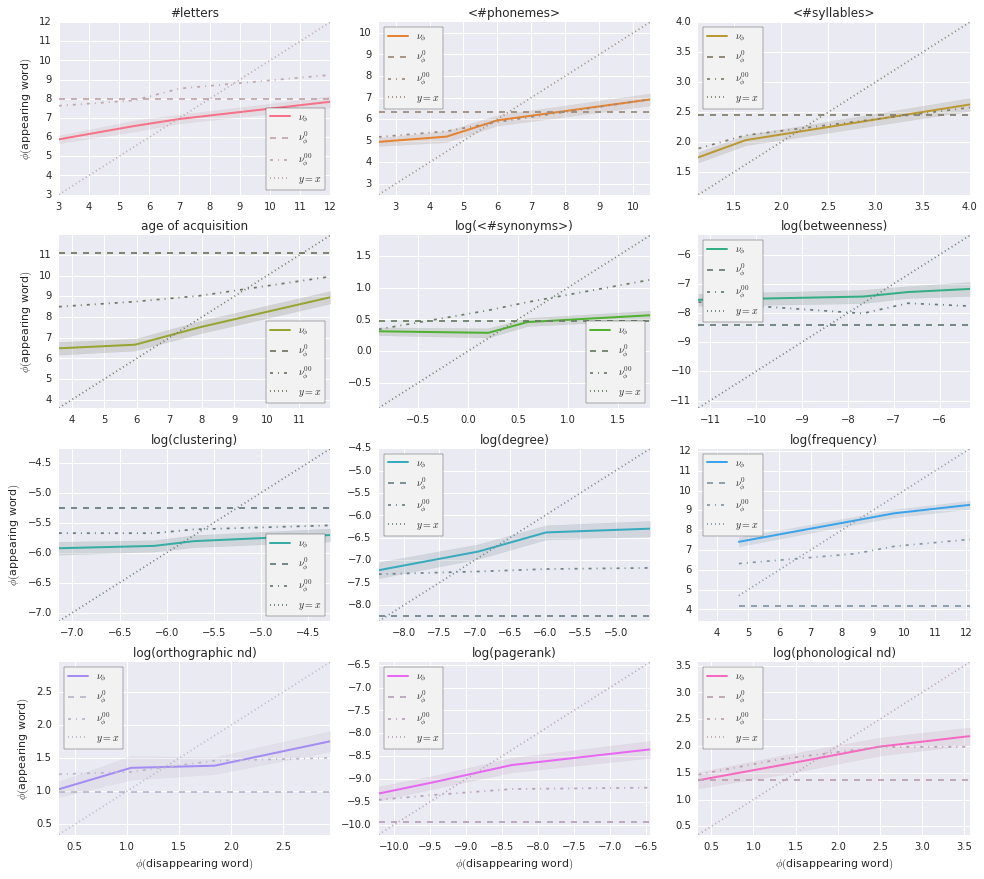

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

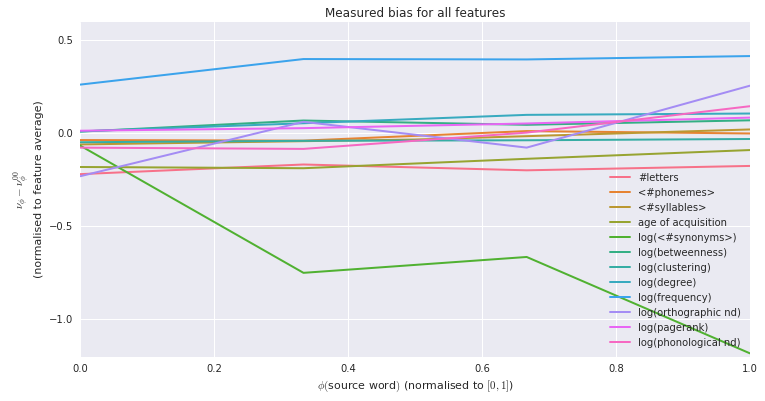

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | **  |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | *** |
H_00 | *** | ns. | ns. | **  |


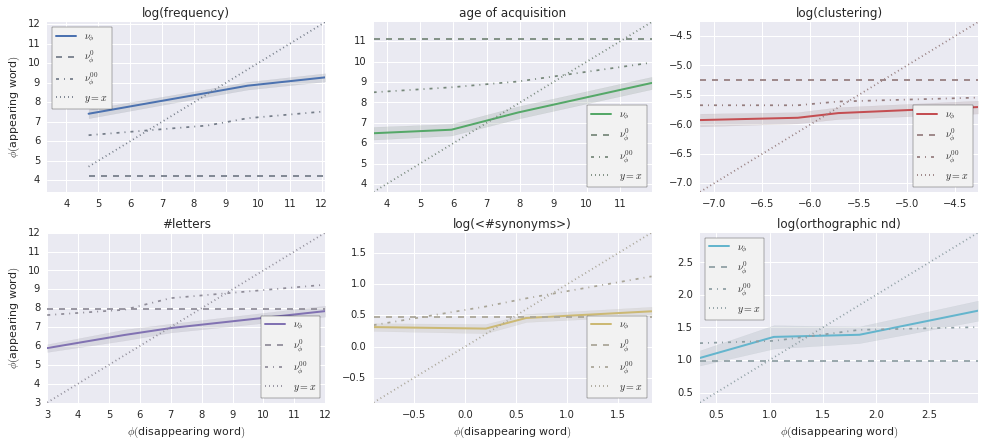

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

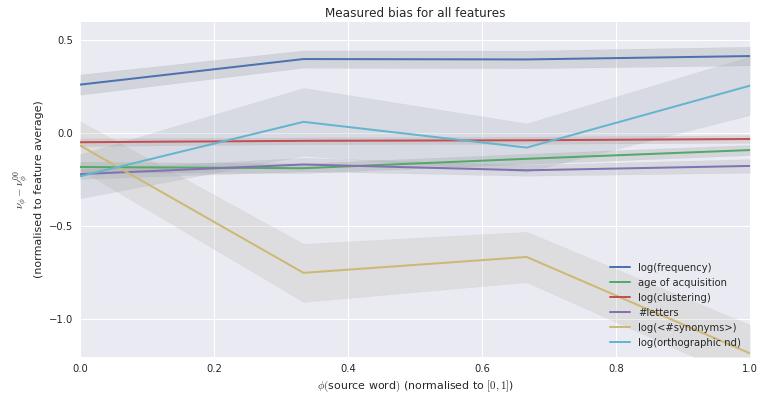

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | ns. |
H_00 | *   | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | ns. |
H_00 | ns. | *   | ns. | *   |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | ns. |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | ns. | ns. | *** | *   |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | **  | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | **  |
H_00 | ns. | **  | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |


H_00 | ns. | **  | ns. | ns. |


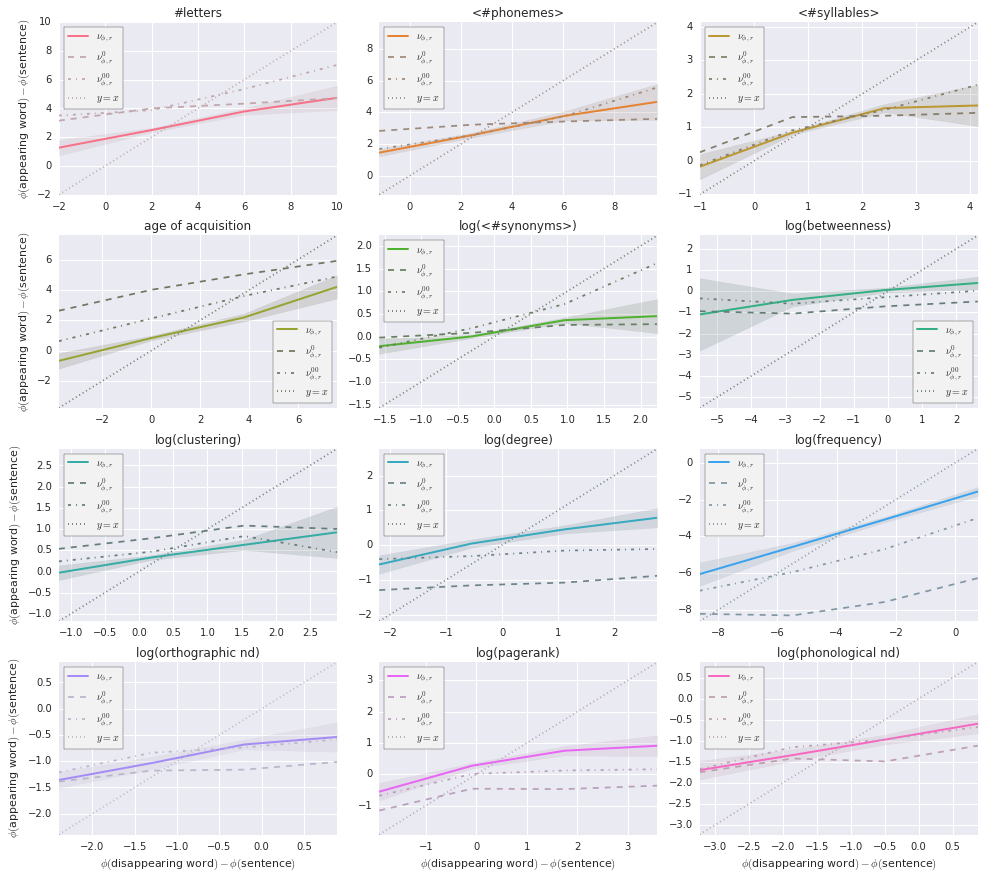

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

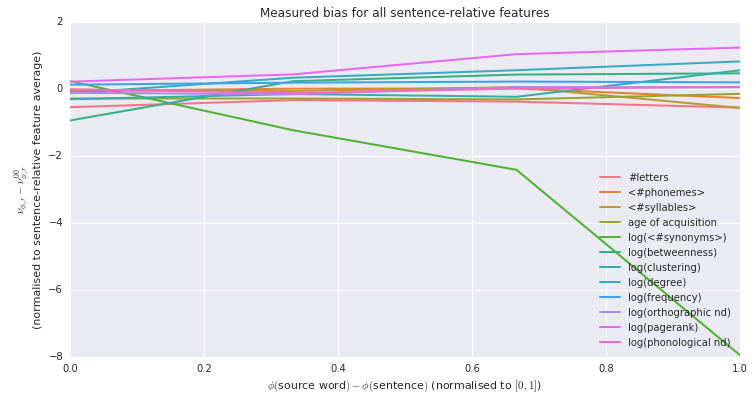

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | **  | *** | **  | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | ns. |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *   | *** | **  |
H_00 | ns. | **  | ns. | ns. |


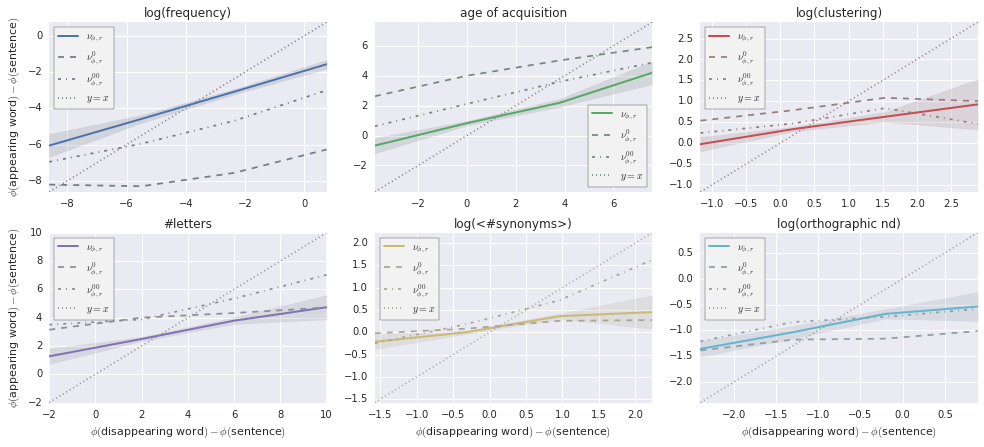

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

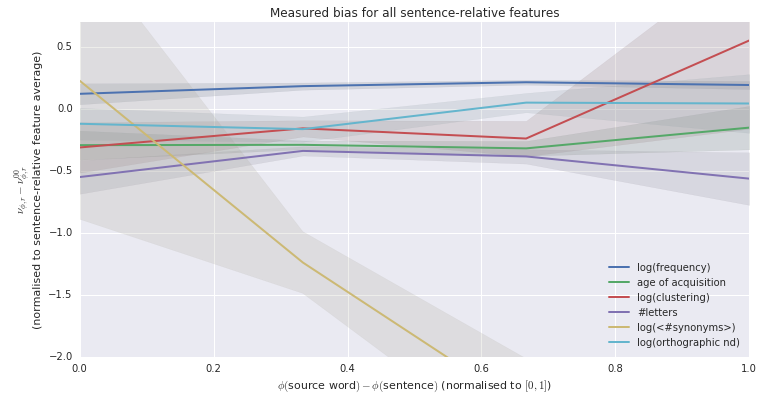

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | **  |
H_00 | *   | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | **  | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *   | ns. | *** |
H_00 | *   | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *   | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | **  | ns. | *** |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | *   | **  | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *   | **  | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |


H_00 | ns. | *   | ns. | ns. |


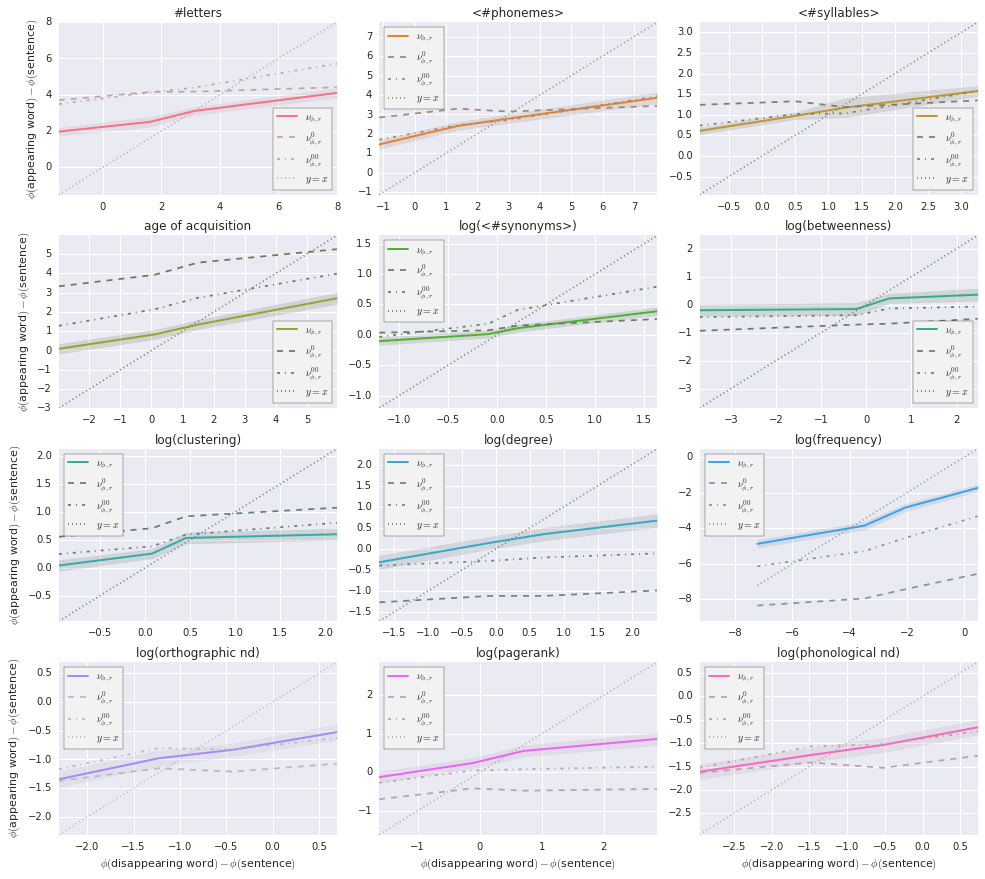

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

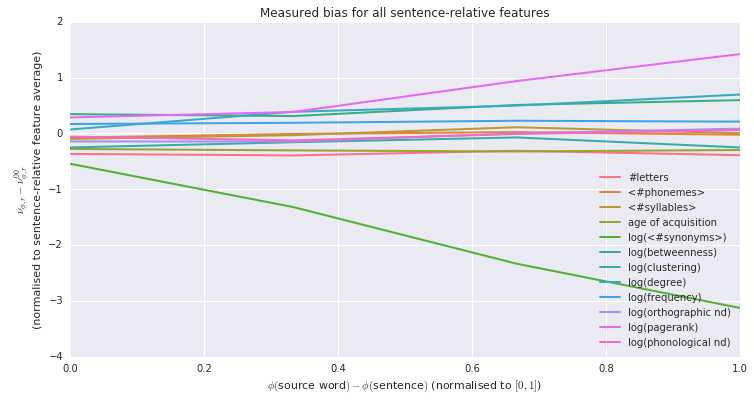

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | **  | ns. | *** |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *   | ns. | *** |
H_00 | *   | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *   | *** | *** |
H_00 | *   | **  | ns. | ns. |


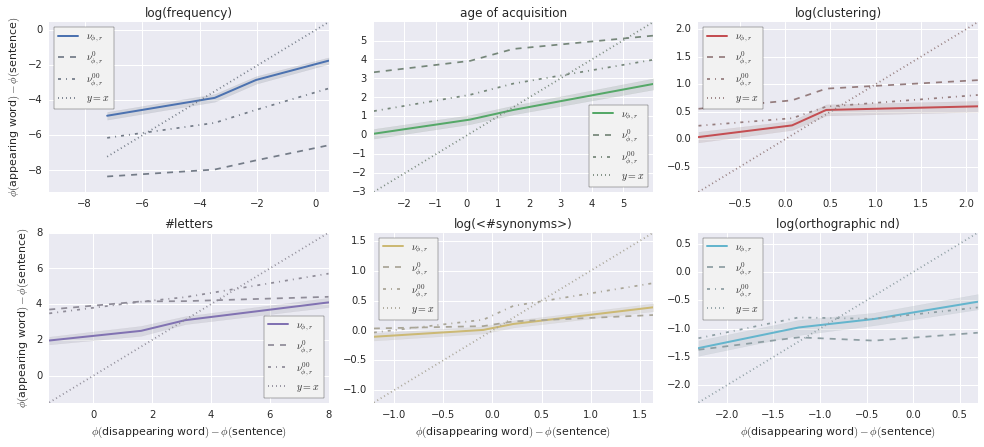

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

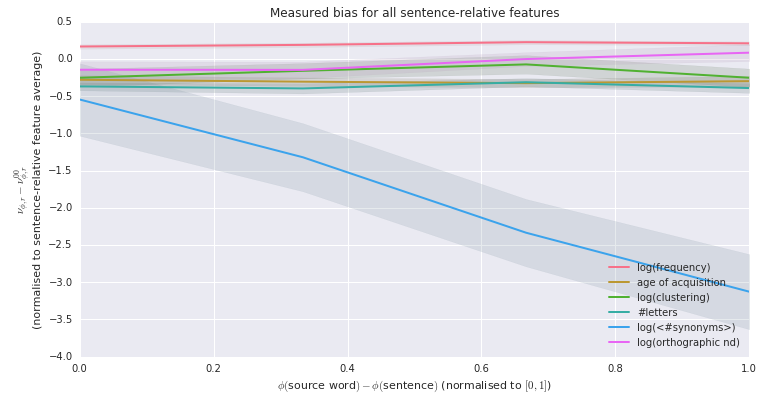

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


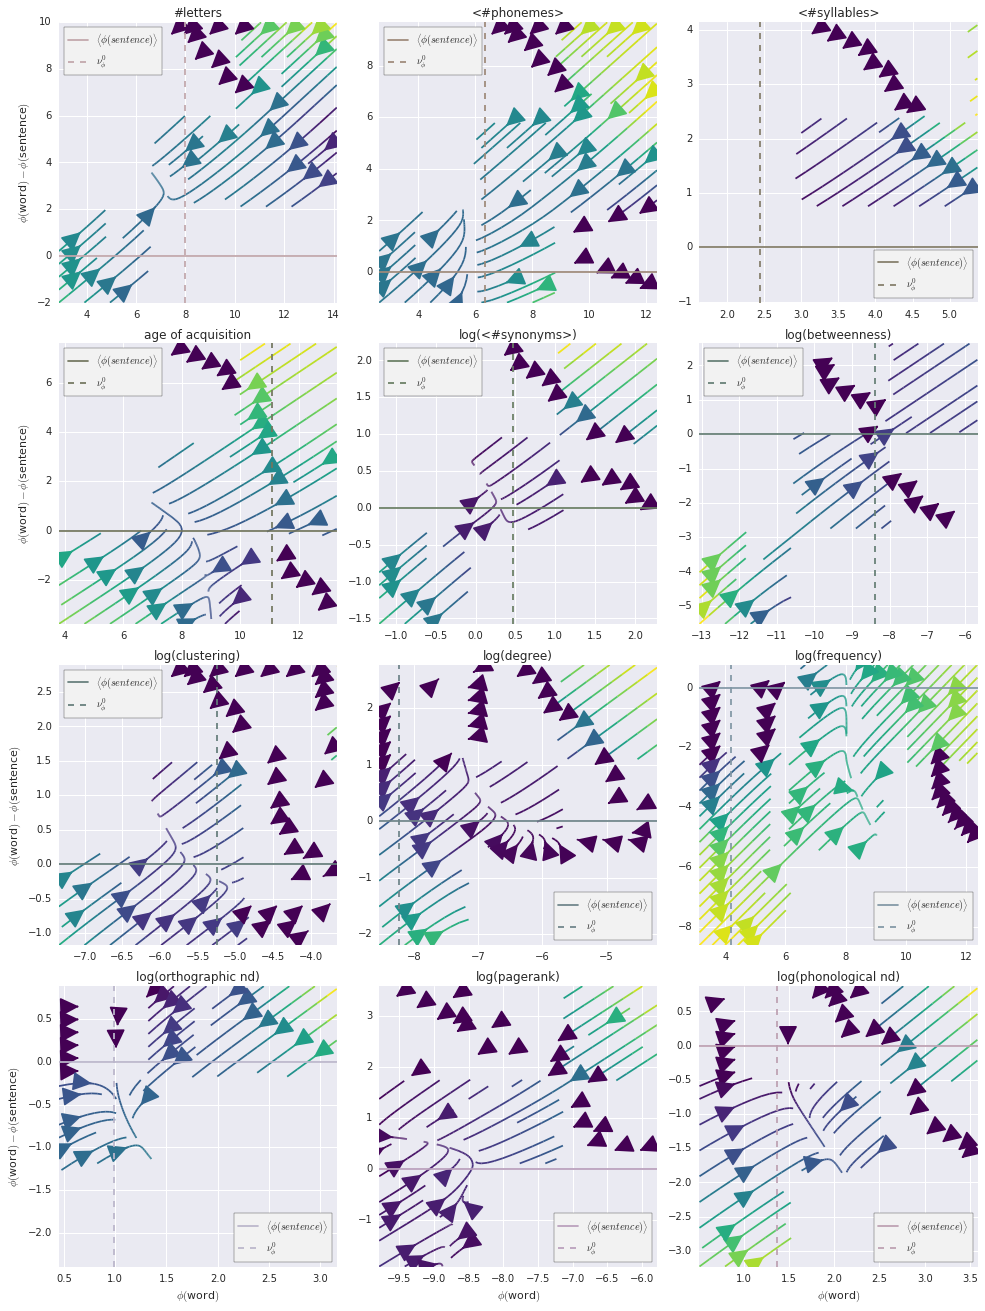

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


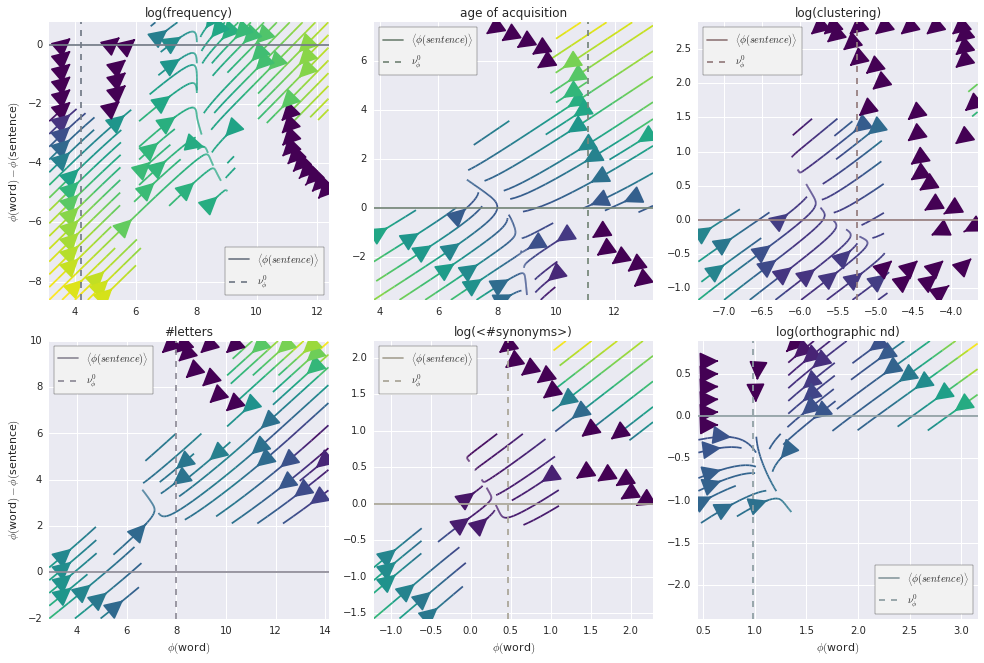

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.53640433  0.16946246  0.08062606  0.07142061  0.03433222  0.02946902
  0.02067933  0.01957253  0.01658681  0.0091576   0.00707813]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.464299,0.312558,-0.086096,0.244891,0.221365,-0.413891,0.229662,0.289709,-0.393644,0.289423,-0.153745,0.002565
Component-1,0.272056,-0.414401,0.150023,-0.283838,-0.283874,-0.411372,0.188006,-0.287212,-0.441902,0.248555,-0.162299,0.011784
Component-2,-0.704369,-0.134468,0.123523,-0.084282,-0.655714,0.098032,0.027147,-0.028908,0.091986,-0.098466,0.008599,0.063609


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 2796) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (  20 of 2796) |                       | Elapsed Time: 0:00:43 ETA: 1:40:34

  1% (  47 of 2796) |                       | Elapsed Time: 0:00:43 ETA: 0:42:35

  2% (  83 of 2796) |                       | Elapsed Time: 0:00:43 ETA: 0:23:58

  3% ( 105 of 2796) |                       | Elapsed Time: 0:00:44 ETA: 0:20:23

  4% ( 124 of 2796) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:25

  5% ( 140 of 2796) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:26

  6% ( 175 of 2796) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:27

  7% ( 197 of 2796) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:27

  7% ( 223 of 2796) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:27

  9% ( 256 of 2796) |##                     | Elapsed Time: 0:00:45 ETA: 0:00:24

 10% ( 280 of 2796) |##                     | Elapsed Time: 0:00:45 ETA: 0:00:22

 11% ( 315 of 2796) |##                     | Elapsed Time: 0:00:46 ETA: 0:00:21

 12% ( 336 of 2796) |##                     | Elapsed Time: 0:00:46 ETA: 0:00:21

 13% ( 365 of 2796) |###                    | Elapsed Time: 0:00:46 ETA: 0:00:21

 14% ( 401 of 2796) |###                    | Elapsed Time: 0:00:46 ETA: 0:00:19

 15% ( 435 of 2796) |###                    | Elapsed Time: 0:00:47 ETA: 0:00:18

 16% ( 469 of 2796) |###                    | Elapsed Time: 0:00:47 ETA: 0:00:17

 17% ( 500 of 2796) |####                   | Elapsed Time: 0:00:47 ETA: 0:00:17

 18% ( 525 of 2796) |####                   | Elapsed Time: 0:00:47 ETA: 0:00:18

 20% ( 560 of 2796) |####                   | Elapsed Time: 0:00:48 ETA: 0:00:18

 20% ( 584 of 2796) |####                   | Elapsed Time: 0:00:48 ETA: 0:00:19

 21% ( 609 of 2796) |#####                  | Elapsed Time: 0:00:48 ETA: 0:00:20

 22% ( 642 of 2796) |#####                  | Elapsed Time: 0:00:49 ETA: 0:00:18

 24% ( 677 of 2796) |#####                  | Elapsed Time: 0:00:49 ETA: 0:00:18

 25% ( 715 of 2796) |#####                  | Elapsed Time: 0:00:49 ETA: 0:00:16

 26% ( 746 of 2796) |######                 | Elapsed Time: 0:00:49 ETA: 0:00:16

 27% ( 769 of 2796) |######                 | Elapsed Time: 0:00:50 ETA: 0:00:16

 28% ( 787 of 2796) |######                 | Elapsed Time: 0:00:50 ETA: 0:00:17

 29% ( 818 of 2796) |######                 | Elapsed Time: 0:00:50 ETA: 0:00:17

 30% ( 851 of 2796) |#######                | Elapsed Time: 0:00:50 ETA: 0:00:17

 31% ( 874 of 2796) |#######                | Elapsed Time: 0:00:50 ETA: 0:00:17

 32% ( 909 of 2796) |#######                | Elapsed Time: 0:00:51 ETA: 0:00:16

 33% ( 944 of 2796) |#######                | Elapsed Time: 0:00:51 ETA: 0:00:15

 35% ( 979 of 2796) |########               | Elapsed Time: 0:00:51 ETA: 0:00:15

 36% (1014 of 2796) |########               | Elapsed Time: 0:00:52 ETA: 0:00:14

 37% (1049 of 2796) |########               | Elapsed Time: 0:00:52 ETA: 0:00:14

 38% (1084 of 2796) |########               | Elapsed Time: 0:00:52 ETA: 0:00:13

 40% (1119 of 2796) |#########              | Elapsed Time: 0:00:52 ETA: 0:00:13

 40% (1143 of 2796) |#########              | Elapsed Time: 0:00:53 ETA: 0:00:13

 41% (1167 of 2796) |#########              | Elapsed Time: 0:00:53 ETA: 0:00:13

 43% (1203 of 2796) |#########              | Elapsed Time: 0:00:53 ETA: 0:00:13

 44% (1237 of 2796) |##########             | Elapsed Time: 0:00:53 ETA: 0:00:13

 45% (1272 of 2796) |##########             | Elapsed Time: 0:00:54 ETA: 0:00:12

 46% (1304 of 2796) |##########             | Elapsed Time: 0:00:54 ETA: 0:00:12

 47% (1329 of 2796) |##########             | Elapsed Time: 0:00:54 ETA: 0:00:12

 48% (1364 of 2796) |###########            | Elapsed Time: 0:00:55 ETA: 0:00:12

 50% (1399 of 2796) |###########            | Elapsed Time: 0:00:55 ETA: 0:00:11

 51% (1433 of 2796) |###########            | Elapsed Time: 0:00:55 ETA: 0:00:11

 52% (1468 of 2796) |############           | Elapsed Time: 0:00:55 ETA: 0:00:11

 53% (1503 of 2796) |############           | Elapsed Time: 0:00:56 ETA: 0:00:10

 55% (1538 of 2796) |############           | Elapsed Time: 0:00:56 ETA: 0:00:10

 56% (1573 of 2796) |############           | Elapsed Time: 0:00:56 ETA: 0:00:10

 57% (1608 of 2796) |#############          | Elapsed Time: 0:00:57 ETA: 0:00:09

 58% (1643 of 2796) |#############          | Elapsed Time: 0:00:57 ETA: 0:00:09

 59% (1665 of 2796) |#############          | Elapsed Time: 0:00:57 ETA: 0:00:09

 60% (1687 of 2796) |#############          | Elapsed Time: 0:00:57 ETA: 0:00:09

 61% (1713 of 2796) |##############         | Elapsed Time: 0:00:58 ETA: 0:00:09

 62% (1748 of 2796) |##############         | Elapsed Time: 0:00:58 ETA: 0:00:09

 63% (1770 of 2796) |##############         | Elapsed Time: 0:00:58 ETA: 0:00:09

 64% (1794 of 2796) |##############         | Elapsed Time: 0:00:58 ETA: 0:00:09

 65% (1830 of 2796) |###############        | Elapsed Time: 0:00:59 ETA: 0:00:08

 66% (1867 of 2796) |###############        | Elapsed Time: 0:00:59 ETA: 0:00:07

 68% (1903 of 2796) |###############        | Elapsed Time: 0:00:59 ETA: 0:00:07

 69% (1938 of 2796) |###############        | Elapsed Time: 0:00:59 ETA: 0:00:06

 70% (1970 of 2796) |################       | Elapsed Time: 0:01:00 ETA: 0:00:06

 71% (2005 of 2796) |################       | Elapsed Time: 0:01:00 ETA: 0:00:06

 72% (2028 of 2796) |################       | Elapsed Time: 0:01:00 ETA: 0:00:06

 73% (2063 of 2796) |################       | Elapsed Time: 0:01:00 ETA: 0:00:05

 75% (2098 of 2796) |#################      | Elapsed Time: 0:01:01 ETA: 0:00:05

 76% (2132 of 2796) |#################      | Elapsed Time: 0:01:01 ETA: 0:00:05

 77% (2167 of 2796) |#################      | Elapsed Time: 0:01:01 ETA: 0:00:05

 78% (2191 of 2796) |##################     | Elapsed Time: 0:01:01 ETA: 0:00:04

 79% (2212 of 2796) |##################     | Elapsed Time: 0:01:02 ETA: 0:00:05

 80% (2237 of 2796) |##################     | Elapsed Time: 0:01:02 ETA: 0:00:04

 81% (2272 of 2796) |##################     | Elapsed Time: 0:01:02 ETA: 0:00:04

 82% (2296 of 2796) |##################     | Elapsed Time: 0:01:02 ETA: 0:00:04

 82% (2320 of 2796) |###################    | Elapsed Time: 0:01:03 ETA: 0:00:04

 84% (2355 of 2796) |###################    | Elapsed Time: 0:01:03 ETA: 0:00:03

 85% (2389 of 2796) |###################    | Elapsed Time: 0:01:03 ETA: 0:00:03

 86% (2424 of 2796) |###################    | Elapsed Time: 0:01:04 ETA: 0:00:03

 87% (2459 of 2796) |####################   | Elapsed Time: 0:01:04 ETA: 0:00:02

 89% (2495 of 2796) |####################   | Elapsed Time: 0:01:04 ETA: 0:00:02

 90% (2517 of 2796) |####################   | Elapsed Time: 0:01:04 ETA: 0:00:02

 90% (2541 of 2796) |####################   | Elapsed Time: 0:01:05 ETA: 0:00:02

 91% (2561 of 2796) |#####################  | Elapsed Time: 0:01:05 ETA: 0:00:02

 92% (2587 of 2796) |#####################  | Elapsed Time: 0:01:05 ETA: 0:00:01

 93% (2622 of 2796) |#####################  | Elapsed Time: 0:01:05 ETA: 0:00:01

 95% (2657 of 2796) |#####################  | Elapsed Time: 0:01:05 ETA: 0:00:01

 95% (2680 of 2796) |###################### | Elapsed Time: 0:01:06 ETA: 0:00:00

 96% (2706 of 2796) |###################### | Elapsed Time: 0:01:06 ETA: 0:00:00

 97% (2740 of 2796) |###################### | Elapsed Time: 0:01:06 ETA: 0:00:00

 99% (2775 of 2796) |###################### | Elapsed Time: 0:01:06 ETA: 0:00:00

100% (2796 of 2796) |######################| Elapsed Time: 0:01:07 Time: 0:01:07


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | *   | ns. | ns. | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |



---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | **  | ns. |


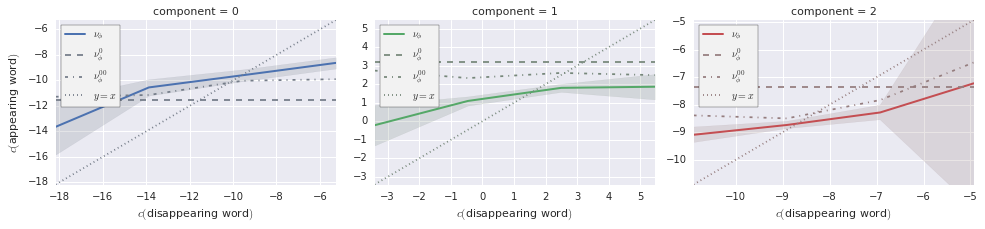

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.67489944  0.18438052]



,aoa,frequency,letters_count
Component-0,-0.745390,0.367805,-0.55598
Component-1,0.403847,-0.414413,-0.81558


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 2796) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (  15 of 2796) |                       | Elapsed Time: 0:00:03 ETA: 0:11:04

  1% (  50 of 2796) |                       | Elapsed Time: 0:00:03 ETA: 0:03:29

  3% (  87 of 2796) |                       | Elapsed Time: 0:00:04 ETA: 0:02:05

  4% ( 121 of 2796) |                       | Elapsed Time: 0:00:04 ETA: 0:01:34

  5% ( 156 of 2796) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:18

  6% ( 191 of 2796) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:17

  8% ( 228 of 2796) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:17

  9% ( 261 of 2796) |##                     | Elapsed Time: 0:00:05 ETA: 0:00:17

 10% ( 298 of 2796) |##                     | Elapsed Time: 0:00:05 ETA: 0:00:15

 11% ( 331 of 2796) |##                     | Elapsed Time: 0:00:05 ETA: 0:00:15

 13% ( 369 of 2796) |###                    | Elapsed Time: 0:00:05 ETA: 0:00:14

 15% ( 420 of 2796) |###                    | Elapsed Time: 0:00:06 ETA: 0:00:14

 16% ( 474 of 2796) |###                    | Elapsed Time: 0:00:06 ETA: 0:00:13

 18% ( 504 of 2796) |####                   | Elapsed Time: 0:00:06 ETA: 0:00:13

 19% ( 543 of 2796) |####                   | Elapsed Time: 0:00:06 ETA: 0:00:13

 20% ( 575 of 2796) |####                   | Elapsed Time: 0:00:07 ETA: 0:00:13

 21% ( 612 of 2796) |#####                  | Elapsed Time: 0:00:07 ETA: 0:00:13

 23% ( 648 of 2796) |#####                  | Elapsed Time: 0:00:07 ETA: 0:00:13

 24% ( 682 of 2796) |#####                  | Elapsed Time: 0:00:07 ETA: 0:00:13

 25% ( 718 of 2796) |#####                  | Elapsed Time: 0:00:07 ETA: 0:00:12

 26% ( 750 of 2796) |######                 | Elapsed Time: 0:00:08 ETA: 0:00:12

 28% ( 783 of 2796) |######                 | Elapsed Time: 0:00:08 ETA: 0:00:12

 29% ( 821 of 2796) |######                 | Elapsed Time: 0:00:08 ETA: 0:00:12

 30% ( 855 of 2796) |#######                | Elapsed Time: 0:00:08 ETA: 0:00:12

 31% ( 890 of 2796) |#######                | Elapsed Time: 0:00:09 ETA: 0:00:12

 33% ( 926 of 2796) |#######                | Elapsed Time: 0:00:09 ETA: 0:00:12

 34% ( 960 of 2796) |#######                | Elapsed Time: 0:00:09 ETA: 0:00:11

 35% ( 996 of 2796) |########               | Elapsed Time: 0:00:09 ETA: 0:00:11

 36% (1031 of 2796) |########               | Elapsed Time: 0:00:09 ETA: 0:00:10

 38% (1067 of 2796) |########               | Elapsed Time: 0:00:10 ETA: 0:00:10

 39% (1101 of 2796) |#########              | Elapsed Time: 0:00:10 ETA: 0:00:10

 40% (1136 of 2796) |#########              | Elapsed Time: 0:00:10 ETA: 0:00:10

 41% (1170 of 2796) |#########              | Elapsed Time: 0:00:10 ETA: 0:00:10

 43% (1207 of 2796) |#########              | Elapsed Time: 0:00:11 ETA: 0:00:09

 45% (1259 of 2796) |##########             | Elapsed Time: 0:00:11 ETA: 0:00:09

 46% (1294 of 2796) |##########             | Elapsed Time: 0:00:11 ETA: 0:00:09

 47% (1329 of 2796) |##########             | Elapsed Time: 0:00:11 ETA: 0:00:09

 48% (1364 of 2796) |###########            | Elapsed Time: 0:00:11 ETA: 0:00:08

 50% (1399 of 2796) |###########            | Elapsed Time: 0:00:12 ETA: 0:00:08

 51% (1433 of 2796) |###########            | Elapsed Time: 0:00:12 ETA: 0:00:08

 52% (1468 of 2796) |############           | Elapsed Time: 0:00:12 ETA: 0:00:08

 53% (1503 of 2796) |############           | Elapsed Time: 0:00:12 ETA: 0:00:07

 55% (1538 of 2796) |############           | Elapsed Time: 0:00:13 ETA: 0:00:07

 56% (1573 of 2796) |############           | Elapsed Time: 0:00:13 ETA: 0:00:07

 57% (1608 of 2796) |#############          | Elapsed Time: 0:00:13 ETA: 0:00:07

 58% (1643 of 2796) |#############          | Elapsed Time: 0:00:13 ETA: 0:00:06

 60% (1678 of 2796) |#############          | Elapsed Time: 0:00:13 ETA: 0:00:06

 61% (1713 of 2796) |##############         | Elapsed Time: 0:00:14 ETA: 0:00:06

 62% (1748 of 2796) |##############         | Elapsed Time: 0:00:14 ETA: 0:00:06

 63% (1783 of 2796) |##############         | Elapsed Time: 0:00:14 ETA: 0:00:06

 65% (1818 of 2796) |##############         | Elapsed Time: 0:00:14 ETA: 0:00:06

 66% (1853 of 2796) |###############        | Elapsed Time: 0:00:14 ETA: 0:00:05

 67% (1888 of 2796) |###############        | Elapsed Time: 0:00:15 ETA: 0:00:05

 68% (1923 of 2796) |###############        | Elapsed Time: 0:00:15 ETA: 0:00:05

 70% (1958 of 2796) |################       | Elapsed Time: 0:00:15 ETA: 0:00:05

 71% (1993 of 2796) |################       | Elapsed Time: 0:00:15 ETA: 0:00:04

 72% (2028 of 2796) |################       | Elapsed Time: 0:00:16 ETA: 0:00:04

 73% (2063 of 2796) |################       | Elapsed Time: 0:00:16 ETA: 0:00:04

 75% (2098 of 2796) |#################      | Elapsed Time: 0:00:16 ETA: 0:00:04

 76% (2132 of 2796) |#################      | Elapsed Time: 0:00:16 ETA: 0:00:04

 77% (2167 of 2796) |#################      | Elapsed Time: 0:00:16 ETA: 0:00:03

 78% (2202 of 2796) |##################     | Elapsed Time: 0:00:17 ETA: 0:00:03

 80% (2237 of 2796) |##################     | Elapsed Time: 0:00:17 ETA: 0:00:03

 81% (2272 of 2796) |##################     | Elapsed Time: 0:00:17 ETA: 0:00:03

 82% (2307 of 2796) |##################     | Elapsed Time: 0:00:17 ETA: 0:00:02

 83% (2342 of 2796) |###################    | Elapsed Time: 0:00:17 ETA: 0:00:02

 85% (2377 of 2796) |###################    | Elapsed Time: 0:00:18 ETA: 0:00:02

 86% (2412 of 2796) |###################    | Elapsed Time: 0:00:18 ETA: 0:00:02

 87% (2447 of 2796) |####################   | Elapsed Time: 0:00:18 ETA: 0:00:02

 88% (2482 of 2796) |####################   | Elapsed Time: 0:00:18 ETA: 0:00:01

 90% (2517 of 2796) |####################   | Elapsed Time: 0:00:19 ETA: 0:00:01

 91% (2552 of 2796) |####################   | Elapsed Time: 0:00:19 ETA: 0:00:01

 92% (2587 of 2796) |#####################  | Elapsed Time: 0:00:19 ETA: 0:00:01

 94% (2640 of 2796) |#####################  | Elapsed Time: 0:00:19 ETA: 0:00:00

 95% (2675 of 2796) |###################### | Elapsed Time: 0:00:19 ETA: 0:00:00

 96% (2710 of 2796) |###################### | Elapsed Time: 0:00:20 ETA: 0:00:00

 98% (2744 of 2796) |###################### | Elapsed Time: 0:00:20 ETA: 0:00:00

 99% (2780 of 2796) |###################### | Elapsed Time: 0:00:20 ETA: 0:00:00

100% (2796 of 2796) |######################| Elapsed Time: 0:00:20 Time: 0:00:20


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |


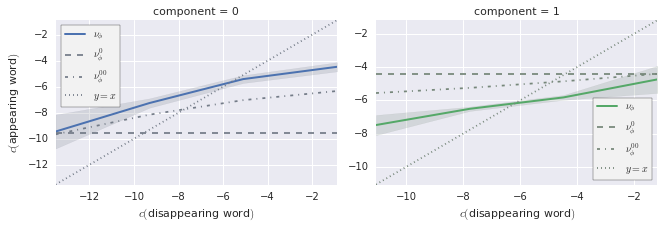

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 1527 (cluster-unique) substitutions, but the PCA is in fact computed on 1226 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


   ** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> aoa
   ** global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  *** global -> global
   ** global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  *** global -> global
   ** global -> sentence-relative


    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
   ** global -> global


   ** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  *** global -> global


    * global -> sentence-relative
  *** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


   ** global -> sentence-relative


   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  *** global -> global


  *** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


   ** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
   ** global -> global
   ** global -> sentence-relative


    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
    * global -> global
    * global -> sentence-relative


  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering
   ** global -> global
    * global -> sentence-relative


   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global


  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


   ** global -> global
    * global -> sentence-relative
   ** sentence-relative -> global


    * sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 908 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.07897840707295034

intercept                      5.439621
global_aoa                     0.040497
global_clustering              0.083370
global_frequency               0.385553
global_letters_count          -0.014396
global_orthographic_density   -0.002815
global_synonyms_count         -0.019218
dtype: float64

Regressing global frequency with 908 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.09153388872159574

intercept                                              6.091697
global_aoa                                             0.129805
global_clustering                                      0.285129
global_frequency                                       0.571458
global_letters_count                                  -0.575781
global_orthographic_density                            0.826915
global_syno

Regressing rel frequency with 908 measures, no interactions
           ^^^^^^^^^^^^^
R^2 = 0.25327777871562807

intercept                  -1.551479
rel_aoa                     0.064562
rel_clustering              0.169761
rel_frequency               0.649874
rel_letters_count          -0.113948
rel_orthographic_density   -0.174954
rel_synonyms_count         -0.007296
dtype: float64

Regressing rel frequency with 908 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.26592861821905633

intercept                                       -1.713013
rel_aoa                                          0.067926
rel_clustering                                   0.259996
rel_frequency                                    0.600974
rel_letters_count                               -0.014486
rel_orthographic_density                        -0.218676
rel_synonyms_count                               0.251031
rel_aoa * rel_clustering                        -0.033377
rel_aoa * rel_frequency            

Regressing global aoa with 841 measures, no interactions
           ^^^^^^^^^^
R^2 = 0.08458383095835142

intercept                      6.715848
global_aoa                     0.237840
global_clustering              0.041469
global_frequency              -0.126834
global_letters_count           0.066535
global_orthographic_density   -0.038418
global_synonyms_count         -0.160542
dtype: float64

Regressing global aoa with 841 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.1116695334373361

intercept                                              9.875626
global_aoa                                            -0.411538
global_clustering                                     -0.356118
global_frequency                                      -0.529593
global_letters_count                                   0.535328
global_orthographic_density                           -1.301176
global_synonyms_count                                 -3.090728
global_aoa * global_clustering             

Regressing rel aoa with 841 measures, with interactions
           ^^^^^^^
R^2 = 0.1819812230741339

intercept                                        0.997306
rel_aoa                                          0.491671
rel_clustering                                  -0.384578
rel_frequency                                   -0.017534
rel_letters_count                               -0.088162
rel_orthographic_density                         0.224226
rel_synonyms_count                              -0.078117
rel_aoa * rel_clustering                        -0.008414
rel_aoa * rel_frequency                          0.027024
rel_aoa * rel_letters_count                      0.026348
rel_aoa * rel_orthographic_density               0.030141
rel_aoa * rel_synonyms_count                    -0.119024
rel_clustering * rel_frequency                  -0.015216
rel_clustering * rel_letters_count               0.189390
rel_clustering * rel_orthographic_density        0.138858
rel_clustering * rel_synonyms

Regressing global clustering with 739 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.08080864743351346

intercept                                             -6.987878
global_aoa                                             0.286701
global_clustering                                     -0.215154
global_frequency                                      -0.348813
global_letters_count                                   0.480794
global_orthographic_density                            0.803546
global_synonyms_count                                  0.141755
global_aoa * global_clustering                         0.053173
global_aoa * global_frequency                          0.003123
global_aoa * global_letters_count                     -0.001725
global_aoa * global_orthographic_density               0.005312
global_aoa * global_synonyms_count                    -0.013954
global_clustering * global_frequency                  -0.050369
global_clustering * global_letters_count      

Regressing global clustering with 739 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.04379376854692674

intercept                     -3.394943
global_aoa                    -0.011083
global_clustering              0.136117
global_frequency              -0.104628
global_letters_count          -0.059721
global_orthographic_density   -0.070458
global_synonyms_count          0.052051
rel_aoa                       -0.000526
rel_clustering                 0.030890
rel_frequency                  0.070369
rel_letters_count              0.051789
rel_orthographic_density       0.073970
rel_synonyms_count            -0.133517
dtype: float64

Regressing global clustering with 739 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.16220341788160542

intercept                                                 8.211730
global_aoa                                               -0.169378
global_clustering                                         2.557407
global_frequency     

Regressing rel letters_count with 908 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.046913631008842493

intercept                      1.001153
global_aoa                     0.000390
global_clustering             -0.133900
global_frequency              -0.028971
global_letters_count           0.217226
global_orthographic_density    0.002737
global_synonyms_count         -0.416629
dtype: float64

Regressing rel letters_count with 908 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.07035257526847372

intercept                                              4.092780
global_aoa                                             0.015633
global_clustering                                     -1.078573
global_frequency                                      -0.252576
global_letters_count                                  -0.665660
global_orthographic_density                           -3.333126
global_synonyms_count                                 -0.898141
global_aoa * 

Regressing global letters_count with 908 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.19120439556463298

intercept                                                 36.551098
global_aoa                                                -1.015784
global_clustering                                          5.358314
global_frequency                                          -0.267451
global_letters_count                                      -2.400440
global_orthographic_density                               -7.043309
global_synonyms_count                                     -1.055762
rel_aoa                                                   -1.873534
rel_clustering                                            -9.381687
rel_frequency                                              1.014887
rel_letters_count                                          3.784836
rel_orthographic_density                                   3.347888
rel_synonyms_count                                      

Regressing rel synonyms_count with 881 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.027163186218870483

intercept                                              1.681120
global_aoa                                             0.028609
global_clustering                                      0.160509
global_frequency                                      -0.148505
global_letters_count                                  -0.120991
global_orthographic_density                           -0.200910
global_synonyms_count                                  0.120933
global_aoa * global_clustering                         0.014981
global_aoa * global_frequency                          0.006135
global_aoa * global_letters_count                     -0.003023
global_aoa * global_orthographic_density               0.009307
global_aoa * global_synonyms_count                     0.020816
global_clustering * global_frequency                  -0.012750
global_clustering * global_letters_count   

intercept                                                 7.965299
global_aoa                                               -0.381502
global_clustering                                         1.739802
global_frequency                                         -0.216545
global_letters_count                                      0.242636
global_orthographic_density                               0.298811
global_synonyms_count                                     1.540704
rel_aoa                                                   0.149740
rel_clustering                                           -0.824227
rel_frequency                                             0.331349
rel_letters_count                                        -0.507127
rel_orthographic_density                                 -0.273960
rel_synonyms_count                                       -3.414363
global_aoa * global_clustering                           -0.022852
global_aoa * global_frequency                             0.02

Regressing global orthographic_density with 745 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.06006555828015647

intercept                   1.624856
rel_aoa                     0.008299
rel_clustering             -0.069706
rel_frequency              -0.002238
rel_letters_count          -0.073358
rel_orthographic_density    0.148661
rel_synonyms_count          0.024007
dtype: float64

Regressing global orthographic_density with 745 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.078840300099565

intercept                                        1.608390
rel_aoa                                          0.088005
rel_clustering                                   0.058847
rel_frequency                                   -0.019756
rel_letters_count                               -0.068430
rel_orthographic_density                         0.223485
rel_synonyms_count                               0.249597
rel_aoa * rel_clustering               

Regressing rel orthographic_density with 745 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.1424678701543104

intercept                      2.083248
global_aoa                    -0.062995
global_clustering              0.126611
global_frequency              -0.007306
global_letters_count          -0.061208
global_orthographic_density   -0.507360
global_synonyms_count         -0.012887
rel_aoa                        0.050453
rel_clustering                -0.121985
rel_frequency                  0.044333
rel_letters_count             -0.019713
rel_orthographic_density       0.656926
rel_synonyms_count             0.025425
dtype: float64

Regressing rel orthographic_density with 745 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.1982399172621354

intercept                                                -7.088358
global_aoa                                                0.223699
global_clustering                                         0.13